In [1]:
!pip install pandas
!pip install scikit-learn 
!pip install numpy
!pip install pillow
!pip install matplotlib

#                                     <u> Heart Disease Analysis <u>
    This analysis looks in to using various python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes.
    
    Steps:
    1. Problem definition
    2. Data 
    3. Evaluation 
    4. Features 
    5. Modelling
    6. Experimentation
    
    
## 1. Problem defintion
    
> Given the clinical parameters about a patient, can we predict whether or not they have heart disease?

## 2. Data
       
   The  Original Data came from the Cleaveland data from The UCI Machine Learning Repository, but used the version of it that is available on kaggle. Link: https://www.kaggle.com/datasets/cherngs/heart-disease-cleveland-uci
       
## 3. Evaluation: 
Since we are predicting whether or not someone has hearth disease, this will be a classification problem. Therfore  we will focus on the accuracy of the model. If we can achieve a  95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project.      

## 4. Features:
       
       ** Creating a Data Dictionary(understanding what ech column represents in detail)**
       
* age -(age in years)

* sex - sex (1: male; 0: female)

* cp - chest pain type 
   * 0: typical angina 
   * 1: atypical angina 
   * 2: non-anginal pain 
   * 3: asymptomatic

* trestbps- resting blood pressure in mm Hg on admission to the hospital.Anything above 130-140 is typically cause for concern.

* chol - serum cholestoral in mg/dl
   * serum = LDL + HDL + .2 triglycerides 
   * above 200 is cause for concern.

* fbs - fasting blood sugar > 120 mg/dl (1: true; 0: false). If its > 126 mg/dl then it signals for diabetes

* restecg - resting electrocardiographic results 
    * 0: normal 
    * 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) 
    * 2: showing probable or definite left ventricular hypertrophy by Estes' criteria( This enlarges hearts main pumping chamber)

* thalach - maximum heart rate achieved

* exang - exercise induced angina (1: yes; 0: no)

* oldpeak - ST depression induced by exercise relative to rest

* slope - the slope of the peak exercise ST segment
      * 0: upsloping 
      * 1: flat 
      * 2: downsloping)

* ca - number of major vessels (0-3) colored by flourosopy

* thal - thalium stress result 
       0: normal; 
       1: fixed defect: Used to be defect but ok now. 
       2: reversable defect: No proper blood movement when exercising

* condition/target- disease condition, which means whether they have heart disease or not. (0: No disease; 1: disease) (The predicted attribute).

## Tools Preparation

Tools: 
  * Pandas, Matplotlib and Numpy for data analysis and Manipulation.
  * Scikit-learn library for our models(modelling)

*Importing tools*

*Exploratory data analysis(EDA), Machine learning and plotting libraries*

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  

# Models from scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier 

# Model Evaluations 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve
import sklearn.metrics as metrics

## Load Data 

In [3]:
data = pd.read_csv("heartdisease.csv")
data.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
data.shape

(303, 14)

## Data Exploration (exploratory data analysis or EDA)

Finding out more about the data



In [5]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [9]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [10]:
data.index

RangeIndex(start=0, stop=303, step=1)

In [11]:
data.shape

(303, 14)

In [12]:
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [13]:
## finding out the total number of each class 
data["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [14]:
data[data["target"] ==1] # snapshot of when someone has heart disease, which is when target(target variable) is = 1

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,56,1,1,120,240,0,1,169,0,0.0,0,0,2,1
161,55,0,1,132,342,0,1,166,0,1.2,2,0,2,1
162,41,1,1,120,157,0,1,182,0,0.0,2,0,2,1
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [15]:
data[data["target"] == 0]  # snapshot of when someone does not have heart disease, which is when target(target variable) is = 0

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
165,67,1,0,160,286,0,0,108,1,1.5,1,3,2,0
166,67,1,0,120,229,0,0,129,1,2.6,1,2,3,0
167,62,0,0,140,268,0,0,160,0,3.6,0,2,2,0
168,63,1,0,130,254,0,0,147,0,1.4,1,1,3,0
169,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


*Frequency of target variable*

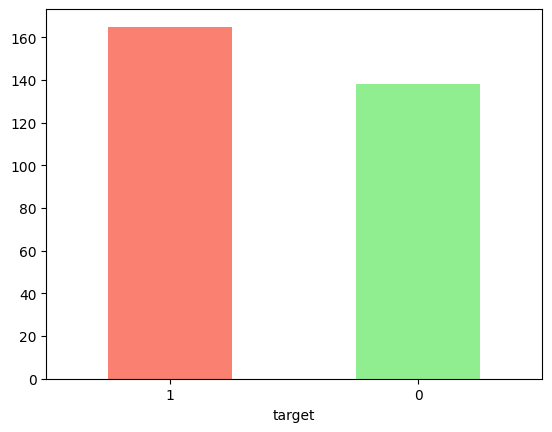

In [16]:
data["target"].value_counts().plot(kind = "bar", color = ["salmon", "lightgreen"])
plt.xticks(rotation = 0);

In [17]:
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [18]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


**Heart disease frequency according to Sex**

In [19]:
data.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [20]:
pd.crosstab(data["target"], data["sex"])

sex,0,1
target,,
0,24,114
1,72,93


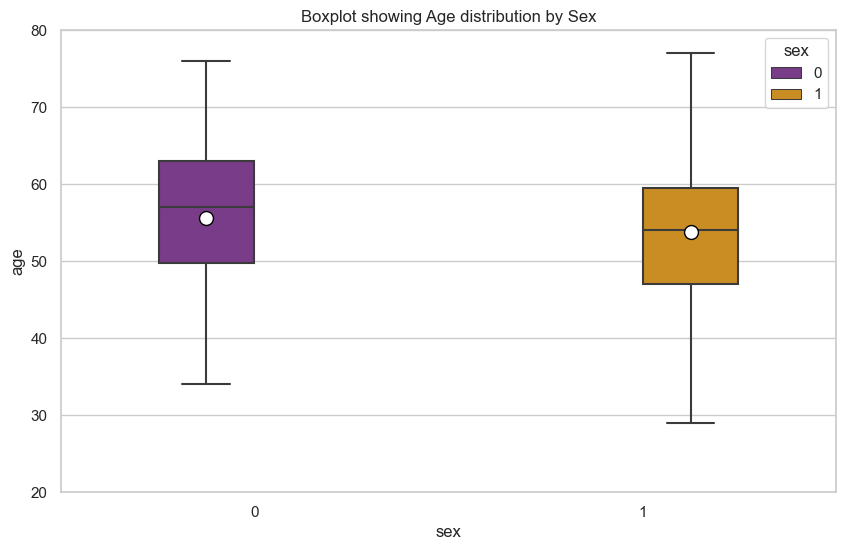

In [21]:
sns.set(style = "whitegrid")
fig, ax = plt.subplots(figsize =(10,6))
sns.boxplot(data, x = "sex", y ="age", width =0.5, color = "lightgreen", hue ="sex",showmeans =True,
            meanprops ={"marker":"o","markerfacecolor":"white","markersize":"10","markeredgecolor":"black"}, palette ="CMRmap")
plt.title("Boxplot showing Age distribution by Sex")
plt.ylabel("age")
plt.xlabel("sex")
plt.ylim([20,80]);

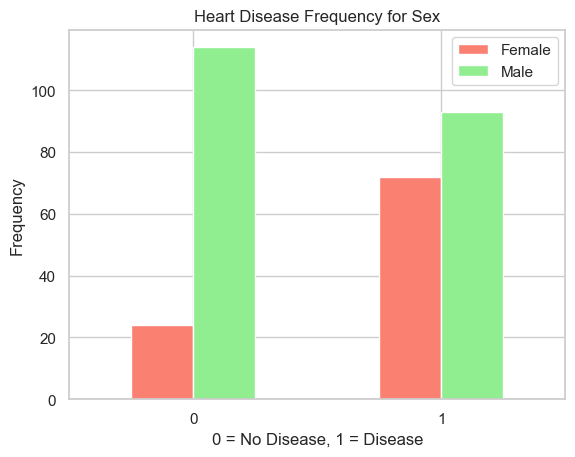

In [22]:
pd.crosstab(data["target"], data["sex"]).plot(kind="bar", color =["salmon","lightgreen"])
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Frequency")
plt.legend(["Female", "Male"])
plt.xticks(rotation = 0);

**comparing age and thalach to the target variable(exploring with scatter plot)** 

*Scatter with Positive examples (when target == 1)*

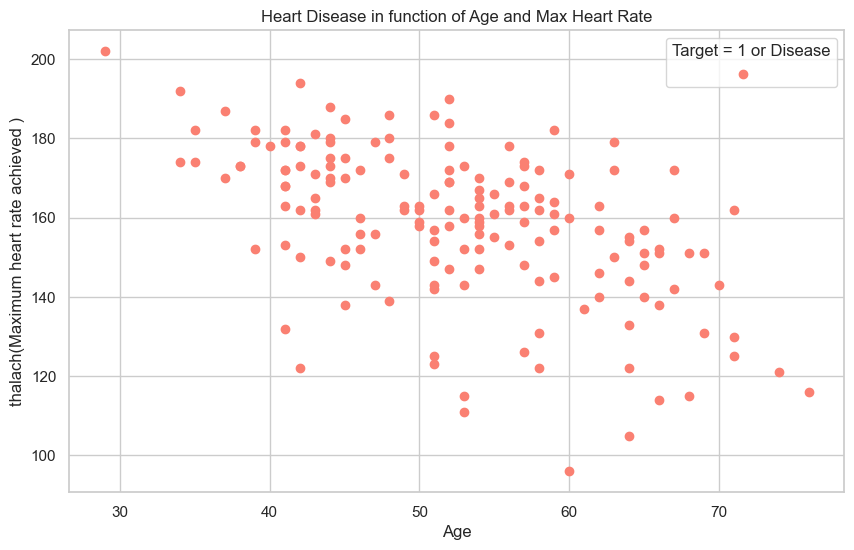

In [23]:
plt.figure(figsize= (10,6))

plt.scatter(data.age[data.target == 1], data.thalach[data.target ==1], color ="salmon" )
plt.xlabel("Age")
plt.ylabel("thalach(Maximum heart rate achieved )")
plt.title("Heart Disease in function of Age and Max Heart Rate");
plt.legend(" ", title = "Target = 1 or Disease"); # D stands for disease(target == 1)


*Scatter with just Negative examples (when target == 0)*

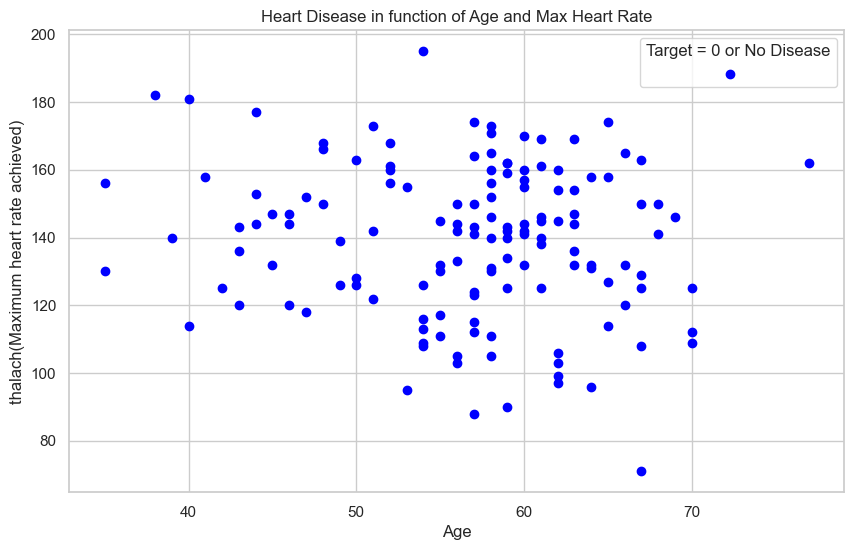

In [24]:
plt.figure(figsize= (10,6))

plt.scatter(data.age[data.target == 0], data.thalach[data.target ==0], color ="blue" )
plt.xlabel("Age")
plt.ylabel("thalach(Maximum heart rate achieved)")
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.legend(" ", title = "Target = 0 or No Disease") # N stands for No disease(target == 0)

*scatter plot with both positive and negative expamples*

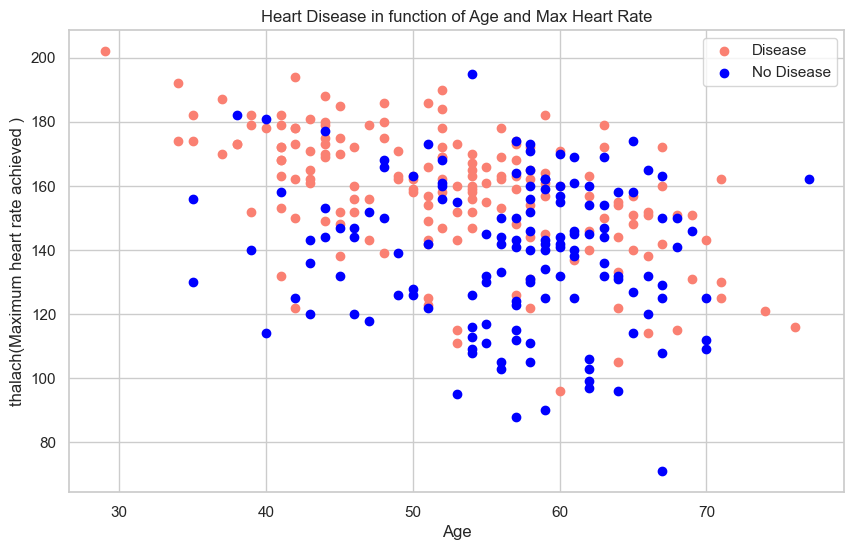

In [25]:
plt.figure(figsize= (10,6))

plt.scatter(data.age[data.target == 1], data.thalach[data.target ==1], color ="salmon" )

plt.scatter(data.age[data.target == 0], data.thalach[data.target ==0], color ="blue")

plt.xlabel("Age")
plt.ylabel("thalach(Maximum heart rate achieved )")
plt.title("Heart Disease in function of Age and Max Heart Rate");
plt.legend(["Disease", "No Disease"]);

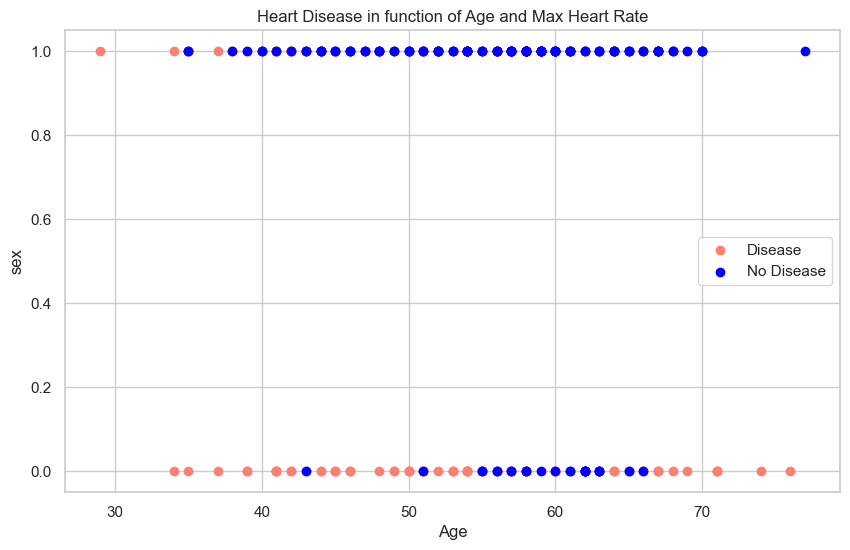

In [26]:
plt.figure(figsize= (10,6))

plt.scatter(data.age[data.target == 1], data.sex[data.target ==1], color ="salmon" )

plt.scatter(data.age[data.target == 0], data.sex[data.target ==0], color ="blue")

plt.xlabel("Age")
plt.ylabel("sex")
plt.title("Heart Disease in function of Age and Max Heart Rate");
plt.legend(["Disease", "No Disease"]);

<Axes: ylabel='Frequency'>

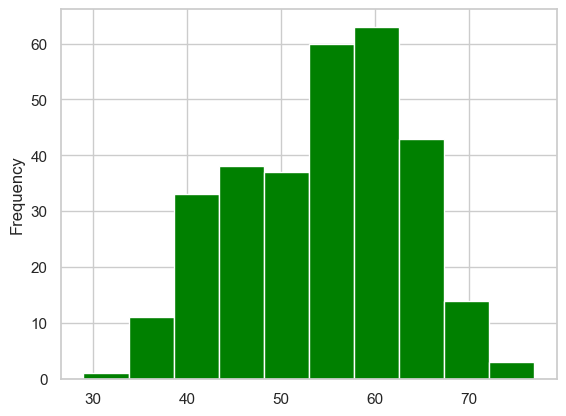

In [27]:
# Checking the distribution of the age column(spread of the age)
data.age.plot(kind ="hist", color = "green")

In [28]:
data.age.value_counts()

age
58    19
57    17
54    16
59    14
52    13
51    12
62    11
60    11
44    11
56    11
64    10
41    10
63     9
67     9
65     8
43     8
45     8
55     8
42     8
61     8
53     8
46     7
48     7
66     7
50     7
49     5
47     5
70     4
39     4
35     4
68     4
38     3
71     3
40     3
69     3
34     2
37     2
29     1
74     1
76     1
77     1
Name: count, dtype: int64

**Heart Disease Frequency per Chest Pain Type**
* cp - chest pain type 
   * 0: typical angina 
   * 1: atypical angina 
   * 2: non-anginal pain 
   * 3: asymptomatic

<Figure size 1000x600 with 0 Axes>

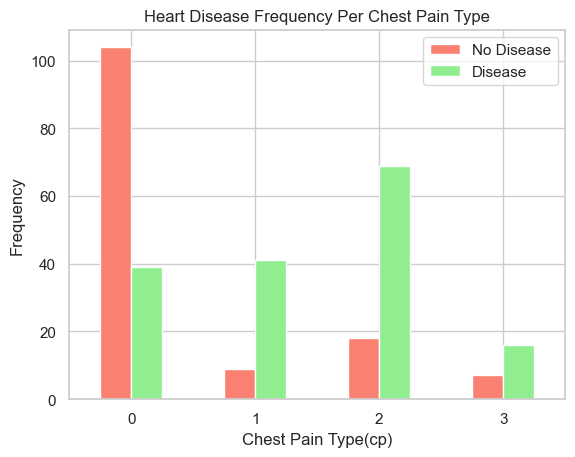

In [29]:
plt.figure(figsize = (10,6))

pd.crosstab(data.cp, data.target).plot(kind ="bar", color =["salmon", "lightgreen"])

plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type(cp)")
plt.ylabel("Frequency")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation = 0);

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

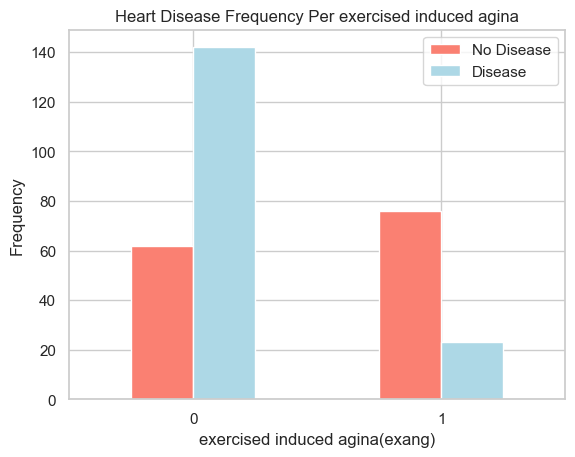

In [30]:
pd.crosstab(data.exang, data.target).plot(kind = "bar", color =["salmon", "lightblue"])
plt.title("Heart Disease Frequency Per exercised induced agina")
plt.xlabel("exercised induced agina(exang)")
plt.ylabel("Frequency")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation = 0)

**Correlation between the independent variables(Exploring the relationship between variables.whether + or - correlation)**

 Lets make a correlation matrix

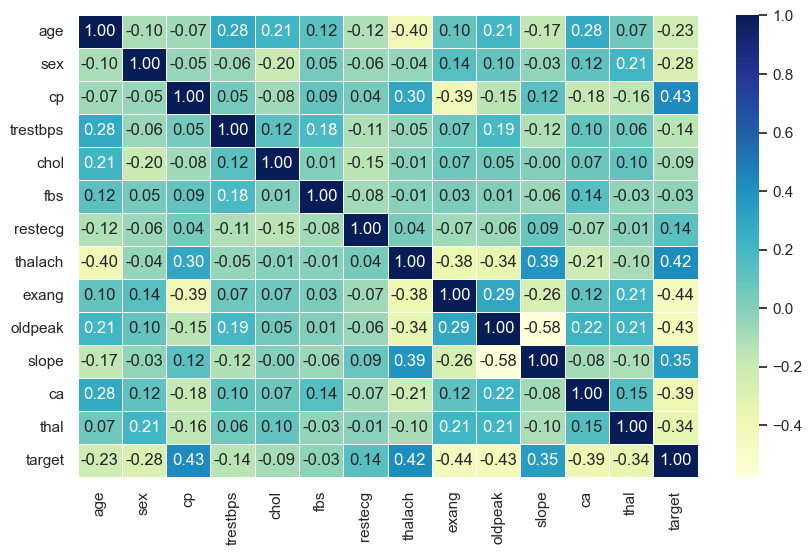

In [31]:
fig, ax = plt.subplots(figsize = (10,6))
corr = data.corr()
ax = sns.heatmap(corr, annot= True, linewidths =0.5, fmt = ".2f", cmap ="YlGnBu");

 # 5. Modelling

In [32]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


** Getting data ready**

In [33]:
#Split data in to X and y

X = data.drop("target", axis = 1)
y = data["target"]

# Split our data in to train and test sets
np.random.seed(10)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.2)

** We are going to try 3 different machine learning models**
   * Logistic Regression
   * K-Nearest Neighbors Classifier 
   * Random forest Classifier

In [34]:
# put models in a dictionary
models = {"Logistic Regression": LogisticRegression(max_iter =1000),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}

#Creating a function to fit and score models
def fit_and_score (models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning model.
    models : a dict of different Scikit-Learn machine leearning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    # set random seed
    np.random.seed(10)
    # Make a dictionary to keep models scores
    model_scores = {}
    #Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Fit the model and append its score to model _scores
        model_scores[name] =model.score(X_test, y_test)
    return model_scores

model_scores = fit_and_score(models, X_train, X_test, y_train, y_test)



model_scores

{'Logistic Regression': 0.7704918032786885,
 'KNN': 0.5901639344262295,
 'Random Forest': 0.8032786885245902}

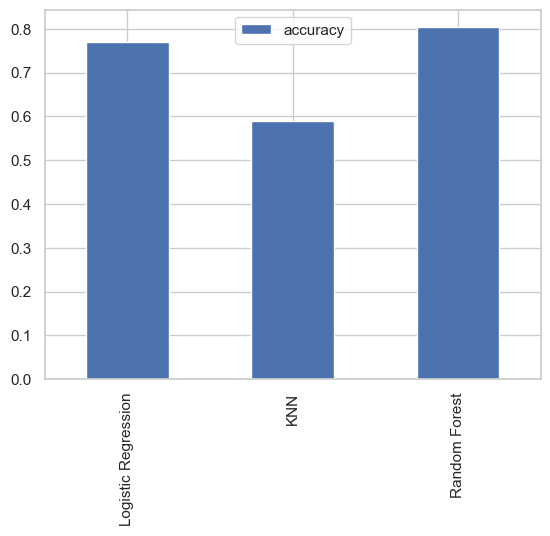

In [35]:
model_compare = pd.DataFrame(model_scores, index =["accuracy"])
model_compare.T.plot.bar();

Lets look at the following:

    * Hyperparameters tuning
    * Feature importance
    * Confusion matrix
    * Cross-validation
    * Precision
    * Recall
    * F1 score
    * Classification report
    * ROC curve
    * Area under the curve (AUC)

# Hyperparameter tuning by hand For KNN

In [36]:
# Lets tune KNN
train_scores = []
test_scores = []

# Creating a list of different values for n_neighbors
neighbors = range(1,21)
# Setup KNN instance
knn = KNeighborsClassifier()

# Looping through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors = i)
    
    # Fit the algorithm
    knn.fit(X_train,y_train)
    
    # Update the training scores list
    train_scores.append(knn.score(X_train, y_train))
    
    # Update the best test scores list
    test_scores.append(knn.score(X_test, y_test))   

In [37]:
train_scores

[1.0,
 0.8181818181818182,
 0.8099173553719008,
 0.7603305785123967,
 0.78099173553719,
 0.7520661157024794,
 0.7396694214876033,
 0.7520661157024794,
 0.7355371900826446,
 0.7231404958677686,
 0.7066115702479339,
 0.7231404958677686,
 0.7107438016528925,
 0.7024793388429752,
 0.7024793388429752,
 0.6983471074380165,
 0.7066115702479339,
 0.6859504132231405,
 0.731404958677686,
 0.731404958677686]

In [38]:
test_scores

[0.5901639344262295,
 0.6557377049180327,
 0.5737704918032787,
 0.639344262295082,
 0.5901639344262295,
 0.7377049180327869,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.6721311475409836,
 0.6721311475409836,
 0.6721311475409836,
 0.6721311475409836,
 0.639344262295082,
 0.6721311475409836,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7049180327868853,
 0.7049180327868853]

Maximum KNN score on the test data: 73.77%


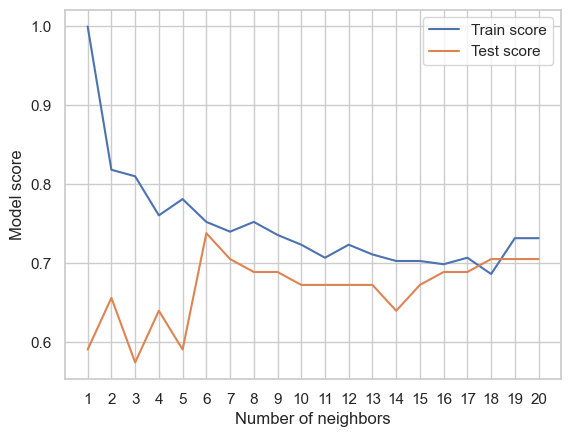

In [39]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label = "Test score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores) * 100:.2f}%")

# Hyperparameter tuning with RandomizedSearchCV

We are going to tune:
   
   * Logistic Regression
   * RandomForestClassifier
   
   ...using RandomizedSearchCV

In [40]:
# Hyperparameter grid creation for LogisticRegression
log_reg_grid = {"C" : np.logspace(-4,4,20), "solver": ["liblinear"]}

# Hyperparameter grid creation for RandomForestClassifier
randf_grid = {"n_estimators": np.arange(10,1000,50),
              "max_depth": [None, 3, 5, 10],
              "min_samples_split": np.arange(2,20,2),
              "min_samples_leaf": np.arange(1,20,2)}

In [41]:
# Tune LogisticRegression

np.random.seed(42)

#Set up  random hyperparameter search for LogisticRegression

rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions =log_reg_grid,
                                cv = 5,
                                n_iter = 20,
                                verbose = True)

# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [42]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [43]:
rs_log_reg.score(X_test, y_test)

0.7704918032786885

In [44]:
# Tune RandomForestClassifier 

np.random.seed(10)

#Set up  random hyperparameter search for RandomForestClasiifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions =randf_grid,
                           cv = 5,
                           n_iter = 20,
                           verbose = True)

# Fit random hyperparameter search model for RandomForestClassifier()
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [45]:
# Find the best hyperparameters
rs_rf.best_params_

{'n_estimators': 410,
 'min_samples_split': 8,
 'min_samples_leaf': 3,
 'max_depth': 10}

In [46]:
# Evaluate the randomized search RandomForestClassifier model
rs_rf.score(X_test, y_test)

0.7868852459016393

In [47]:
model_scores

{'Logistic Regression': 0.7704918032786885,
 'KNN': 0.5901639344262295,
 'Random Forest': 0.8032786885245902}

# Hyperparameter tuning with GridSearchCV

Since our RandomForest performed better, we will improve it by using GridSearchCV.

In [48]:
# Hyperparameter grid creation for RandomForestClassifier
import numpy as np
randf_grid = {"n_estimators": np.arange(10,100,50),
              "max_depth": [None, 3, 5],
              "min_samples_split": np.arange(2,20,2),
              "min_samples_leaf": np.arange(1,20,2)}

In [49]:
#Set up  random hyperparameter search for RandomForestClasiifier
gs_rf = GridSearchCV(RandomForestClassifier(),
                           param_grid =randf_grid,
                           cv = 5,
                           verbose = True)

# Fit frid hyperparameter search model
gs_rf.fit(X_train, y_train);

Fitting 5 folds for each of 540 candidates, totalling 2700 fits


In [50]:
#Check the best hyperparameters
gs_rf.best_params_

{'max_depth': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 4,
 'n_estimators': 10}

In [51]:
#Evaluate the grid search RandomForestClassifier model
gs_rf.score(X_test, y_test)

0.7868852459016393

In [52]:
model_scores

{'Logistic Regression': 0.7704918032786885,
 'KNN': 0.5901639344262295,
 'Random Forest': 0.8032786885245902}

# Evaluating our tuned machine learning classifier, beyond accuracy
  * ROC curve and AUC score
  * Confusion Matrix
  * Classification report
  * Precision
  * Recall
  * F1-score
  
  In other to make comparisons and evaluate the trained model, first we need to make predictions.

In [53]:
# Make predictions with tuned model
y_preds = gs_rf.predict(X_test)

In [54]:
y_preds

array([0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0], dtype=int64)

In [55]:
y_test

246    0
183    0
229    0
126    1
184    0
      ..
277    0
121    1
187    0
301    0
283    0
Name: target, Length: 61, dtype: int64

**plot ROC Curve and calculate AUC metric**

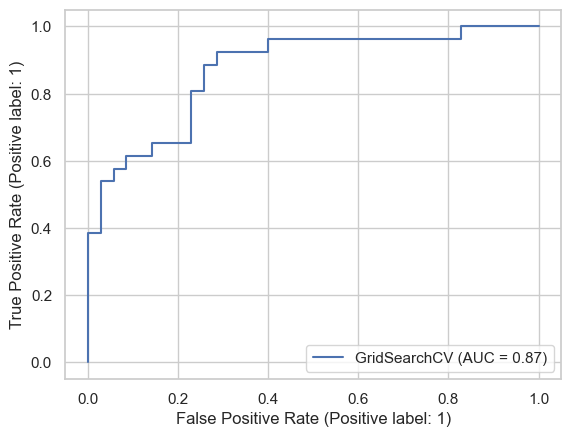

In [56]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(gs_rf, X_test, y_test)

**confusion matrix**

In [57]:
print(confusion_matrix(y_test, y_preds))

[[26  9]
 [ 4 22]]


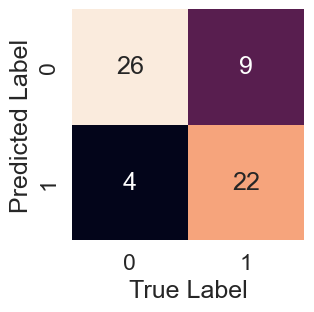

In [58]:
sns.set(font_scale = 1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize= (3,3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot = True,
                     cbar = False)
    plt.xlabel("True Label")
    plt.ylabel("Predicted Label")
    
plot_conf_mat(y_test, y_preds)    

# Lets get a classification report as well as cross-validated precision, recall and f1_score.

In [59]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.87      0.74      0.80        35
           1       0.71      0.85      0.77        26

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.80      0.79      0.79        61



# Calculate evaluation metrics using cross_validation

Calculating precison, recall and f1_score of our model using cross-validation and to do so
we will be using cross_val_score().

In [60]:
# Checking the best hyperparameters 
gs_rf.best_params_

{'max_depth': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 4,
 'n_estimators': 10}

In [61]:
# Creating a new classifier with the best parameters
clf = RandomForestClassifier(max_depth= 3,
                             min_samples_leaf= 3,
                             min_samples_split= 4,
                             n_estimators= 10)

In [62]:
# Cross-validated accuracy
cv_acc = cross_val_score(clf,
                         X,
                         y,
                         cv = 5,
                         scoring = "accuracy")
cv_acc

array([0.78688525, 0.8852459 , 0.83606557, 0.78333333, 0.75      ])

In [63]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8083060109289617

In [64]:
cv_precision = cross_val_score(clf,
                         X,
                         y,
                         cv = 5,
                         scoring = "precision")
cv_precision = np.mean(cv_precision)
cv_precision

0.8071592623063211

In [65]:
cv_recall = cross_val_score(clf,
                         X,
                         y,
                         cv = 5,
                         scoring = "recall")
cv_recall = np.mean(cv_recall)
cv_recall

0.884848484848485

In [66]:
cv_f1 = cross_val_score(clf,
                         X,
                         y,
                         cv = 5,
                         scoring = "f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.8316957084386661

<Axes: title={'center': 'Cross-validated classification metrics'}>

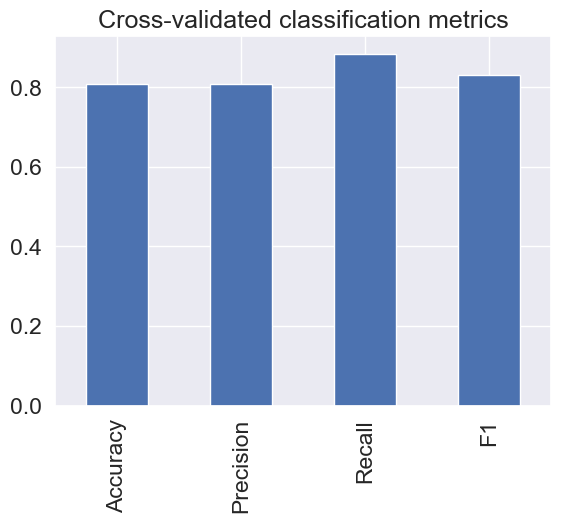

In [67]:
# Visualizing cross_validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                           "Precision": cv_precision,
                           "Recall": cv_recall,
                           "F1": cv_f1}, index =[0])

cv_metrics.T.plot.bar(title = "Cross-validated classification metrics", legend = False)

# Feature Importance (*features that contributes most to the outcome of the models and how they contibuted*). It can also be known as the coefficient.

Feature importance is different with each machine learning model(one way to find feature importance is to search for ""(Model Name) feature importance".

Find the feature importance of our RandomForestClassifier since it performed the best.

In [68]:
# fit an instance of RandomForest Classifier
gs_rf.best_params_

{'max_depth': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 4,
 'n_estimators': 10}

In [69]:
cla = RandomForestClassifier(max_depth= 3,
                             min_samples_leaf = 3,
                             min_samples_split= 4,
                             n_estimators = 10)



In [70]:
cla.fit(X_train, y_train)

cla.feature_importances_

array([0.04305239, 0.01984122, 0.32853727, 0.0181345 , 0.01157007,
       0.00574042, 0.00836886, 0.04741269, 0.05764184, 0.11164299,
       0.04713774, 0.21125589, 0.08966412])

In [71]:
# Creating a dictionary to view the coefficient value of each feature/column
feature_dictionary = dict(zip(data.columns, list(cla.feature_importances_)))
feature_dictionary

{'age': 0.04305238730503052,
 'sex': 0.0198412232143827,
 'cp': 0.3285372745881341,
 'trestbps': 0.018134496404704957,
 'chol': 0.011570067131126762,
 'fbs': 0.005740418150877416,
 'restecg': 0.00836885948736672,
 'thalach': 0.04741268817003478,
 'exang': 0.057641839927276076,
 'oldpeak': 0.11164299216523532,
 'slope': 0.047137741640993575,
 'ca': 0.21125589229775624,
 'thal': 0.08966411951708082}

**Visualize feature importance**

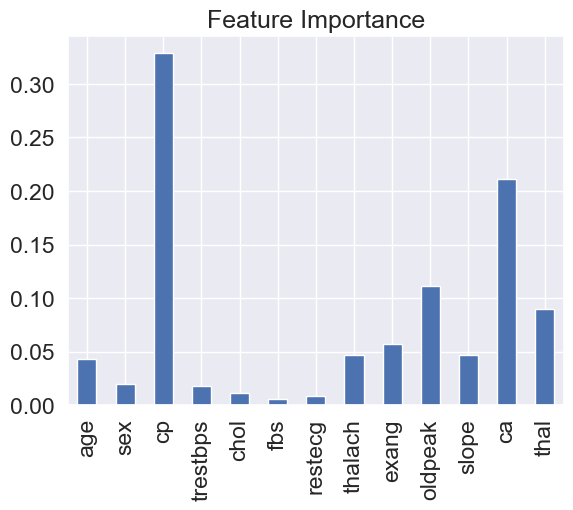

In [72]:
feature_data = pd.DataFrame(feature_dictionary, index=[0])
feature_data.T.plot.bar(title = "Feature Importance", legend = False);

# 6. Experimentation

since evaluation metric of 95% accuracy was not met. We could try out the following steps: 

 * Collecting more data(samples) to help our model learn more patterns about the data.
 * Try a better model like CatBoost or XGBoost.
 * Further improving our model by tunning different hyperparameters.